In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [ ]:
#Read dataset to pandas dataframe
dataset = pd.read_excel('/content/drive/MyDrive/MTP_FINAL/Chilikaujainiukai_Inland_Water/CHILIKAUJANI.xlsx')

In [ ]:
#breaking down the dataset into x feature and y target
dataset_y=dataset['Chlorophyll']
dataset_x=dataset.drop(['Chlorophyll'],axis=1)
dataset = dataset.drop(['Site'],axis=1)

In [ ]:
dataset

,Chlorophyll,400,401,402,403,404,405,406,407,408,...,791,792,793,794,795,796,797,798,799,800
0,13.759000,0.003075,0.003139,0.003203,0.003264,0.003326,0.003389,0.003456,0.003532,0.003615,...,0.003317,0.003369,0.003424,0.003481,0.003538,0.003594,0.003647,0.003700,0.003756,0.003813
1,8.098000,0.007003,0.007098,0.007199,0.007305,0.007415,0.007521,0.007632,0.007757,0.007889,...,0.001610,0.001633,0.001669,0.001705,0.001729,0.001750,0.001770,0.001792,0.001817,0.001845
2,10.738000,0.006881,0.006979,0.007079,0.007183,0.007287,0.007384,0.007484,0.007596,0.007714,...,0.002173,0.002213,0.002241,0.002268,0.002298,0.002332,0.002377,0.002421,0.002454,0.002480
3,9.586560,0.010357,0.010403,0.010409,0.010384,0.010359,0.010387,0.010447,0.010461,0.010458,...,0.003799,0.003820,0.003842,0.003837,0.003862,0.003908,0.003900,0.003893,0.003916,0.003960
4,16.748560,0.003785,0.003797,0.003748,0.003744,0.003704,0.003697,0.003726,0.003734,0.003748,...,0.000673,0.000673,0.000656,0.000648,0.000671,0.000696,0.000654,0.000663,0.000693,0.000703
5,11.191800,0.003721,0.003715,0.003672,0.003689,0.003675,0.003660,0.003655,0.003647,0.003640,...,0.000712,0.000711,0.000717,0.000711,0.000705,0.000705,0.000704,0.000717,0.000736,0.000746
6,26.694699,0.003970,0.003970,0.003954,0.003895,0.003872,0.003885,0.003875,0.003846,0.003817,...,0.001517,0.001522,0.001523,0.001535,0.001549,0.001553,0.001547,0.001538,0.001537,0.001542
7,28.918223,0.003855,0.003836,0.003789,0.003784,0.003778,0.003763,0.003716,0.003665,0.003662,...,0.001679,0.001675,0.001695,0.001705,0.001708,0.001707,0.001718,0.001730,0.001700,0.001707
8,26.951160,0.003797,0.003782,0.003761,0.003714,0.003699,0.003713,0.003700,0.003669,0.003657,...,0.001607,0.001603,0.001605,0.001631,0.001646,0.001604,0.001630,0.001661,0.001635,0.001641
9,25.577467,0.001688,0.001694,0.001718,0.001715,0.001702,0.001658,0.001656,0.001659,0.001635,...,0.001285,0.001275,0.001310,0.001326,0.001331,0.001324,0.001325,0.001329,0.001349,0.001351


                            **Single** **Band** **Ratio**

In [ ]:
corr=[]
a=0
for i in range(401):
  a = 400+i
  corr.append(dataset['Chlorophyll'].corr(dataset[a]))

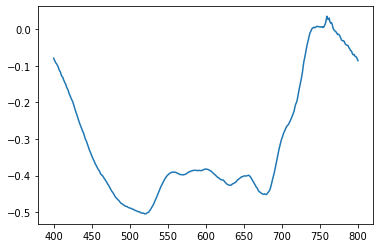

In [ ]:
import matplotlib.pyplot as plt
l = [400+i for i in range(401)]
plt.plot(l,corr)

In [ ]:
 v = corr.index(max(corr))
 print('largest correlation value band',l[v])
 p = corr.index(max(corr))
 corr.pop(p)
 l.pop(p)
 p = corr.index(max(corr))
 print('second largest correlation value band',l[p])

largest correlation value band 759
second largest correlation value band 762


In [ ]:
y = dataset['Chlorophyll']
y = y.to_numpy()
y = y.reshape((-1,1))
x = dataset.iloc[:,v+1]
x = x.to_numpy()
x = x.reshape((-1,1))
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model_lr = LinearRegression().fit(X_train, y_train)
y_predicted_lr = model_lr.predict(X_test)
rms = sqrt(mean_squared_error(y_test, y_predicted_lr))
print(rms)
r_sq = model_lr.score(X_test, y_test)
print(r_sq)
print('y =', model_lr.coef_,'x+',model_lr.intercept_)

9.076011308966738
-0.2588243898718925
y = [[740.23559645]] x+ [15.82162167]


                        **First** **Derivative**

In [ ]:
data_first_derivative  = pd.DataFrame()
data_first_derivative['400'] = dataset.iloc[:,1]
a=0
for i in range(2,402):
  a = 400+(i-1)
  data_first_derivative[str(a)] = 0.1*(dataset.iloc[:,i] - dataset.iloc[:,i-1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [ ]:
corr=[]
a=0
for i in range(401):
  a = 400+i
  corr.append(dataset['Chlorophyll'].corr(data_first_derivative[str(a)]))

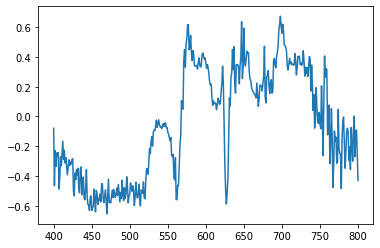

In [ ]:
l = [400+i for i in range(401)]
plt.plot(l,corr)

In [ ]:
 v = corr.index(max(corr))
 print(v)
 print('largest correlation value band',l[v])
 p = corr.index(max(corr))
 corr.pop(p)
 l.pop(p)
 p = corr.index(max(corr))
 print('second largest correlation value band',l[p])
 dataset.iloc[:,v]

298
largest correlation value band 698
second largest correlation value band 647


0     0.018761
1     0.014935
2     0.017460
3     0.010795
4     0.002949
5     0.002603
6     0.003641
7     0.003642
8     0.003587
9     0.003024
10    0.003192
11    0.003727
12    0.003689
13    0.003641
14    0.015914
15    0.020899
16    0.023351
17    0.015343
18    0.014513
19    0.019610
20    0.016676
21    0.013423
22    0.020239
23    0.012315
24    0.014419
25    0.014260
26    0.010292
27    0.010531
28    0.002636
29    0.004247
30    0.003517
31    0.007244
32    0.003692
33    0.003322
34    0.003192
35    0.003663
36    0.022177
37    0.025634
Name: 697, dtype: float64

In [ ]:
y = dataset['Chlorophyll']
y = y.to_numpy()
y = y.reshape((-1,1))
x = 1*(dataset.iloc[:,v+2] - dataset.iloc[:,v+1])
x = x.to_numpy()
x = x.reshape((-1,1))
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model_lr = LinearRegression().fit(X_train, y_train)
y_predicted_lr = model_lr.predict(X_test)
rms = sqrt(mean_squared_error(y_test, y_predicted_lr))
print(rms)
r_sq = model_lr.score(X_test, y_test)
print(r_sq)
print('y =', model_lr.coef_,'x+',model_lr.intercept_)

7.161071168909364
0.2163338791650542
y = [[39152.7994688]] x+ [21.85409546]


                        **Second Derivative**

In [ ]:
data_second_derivative  = pd.DataFrame()
# data_second_derivative['400'] = data.iloc[:,1]
a=0
for i in range(2,401):
  a = 400+(i-1)
  data_second_derivative[str(a)] = 1*(-2*dataset.iloc[:,i] +(dataset.iloc[:,i-1]+dataset.iloc[:,i+1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [ ]:
corr=[]
a=0
for i in range(399):
  a = 400+(i+1)
  corr.append(dataset['Chlorophyll'].corr(data_second_derivative[str(a)]))

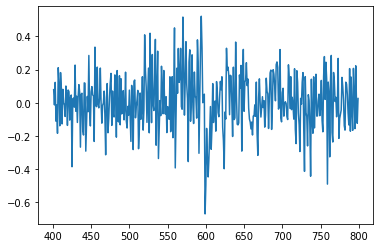

In [ ]:
l = [400+i for i in range(1,400)]
plt.plot(l,corr)

In [ ]:
 v = corr.index(max(corr))
 print('largest correlation value band',l[v])
 p = corr.index(max(corr))
 corr.pop(p)
 l.pop(p)
 p = corr.index(max(corr))
 print('second largest correlation value band',l[p])
 dataset.iloc[:,v]

largest correlation value band 594
second largest correlation value band 570


0     0.027839
1     0.036008
2     0.037009
3     0.022843
4     0.007880
5     0.007525
6     0.006373
7     0.006157
8     0.006119
9     0.005130
10    0.005214
11    0.005802
12    0.005822
13    0.005796
14    0.030228
15    0.039265
16    0.043582
17    0.029894
18    0.027115
19    0.035553
20    0.032771
21    0.025696
22    0.034436
23    0.022346
24    0.022386
25    0.022572
26    0.021347
27    0.017007
28    0.007563
29    0.009029
30    0.005514
31    0.011920
32    0.006163
33    0.005429
34    0.005214
35    0.005777
36    0.039085
37    0.045378
Name: 592, dtype: float64

In [ ]:
y = dataset['Chlorophyll']
y = y.to_numpy()
y = y.reshape((-1,1))
x = (-2*dataset.iloc[:,v+2] +(dataset.iloc[:,v+1]+dataset.iloc[:,v+3]))
x = x.to_numpy()
x = x.reshape((-1,1))
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model_lr = LinearRegression().fit(X_train, y_train)
y_predicted_lr = model_lr.predict(X_test)
rms = sqrt(mean_squared_error(y_test, y_predicted_lr))
print(rms)
r_sq = model_lr.score(X_test, y_test)
print(r_sq)
print('y =', model_lr.coef_,'x+',model_lr.intercept_)

7.041999926591013
0.24217814728246023
y = [[85766.45082147]] x+ [20.29705226]


                                    **Band Ratio**

In [ ]:
data_band_ratio = pd.DataFrame()
a=0
for j in range(1,401):
  b =0
  a = 400+(j-1)
  for i in range(1,401):
    if i!=j:
      b = 400+(i-1)
      data_band_ratio[str(a)+'_'+str(b)] = dataset.iloc[:,j]/dataset.iloc[:,i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if __name__ == '__main__':


In [ ]:
corr=[]
a=0
for i in data_band_ratio.columns:
  corr.append(dataset['Chlorophyll'].corr(data_band_ratio[i]))

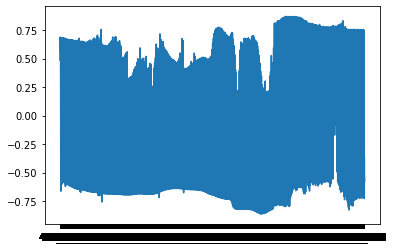

In [ ]:
plt.plot(data_band_ratio.columns,corr)

In [ ]:
l =[]
for i in data_band_ratio.columns:
  l.append(i)

NameError: ignored

In [ ]:
 v = corr.index(max(corr))
 print('largest correlation value band',l[v])
 p = corr.index(max(corr))
 corr.pop(p)
 l.pop(p)
 p = corr.index(max(corr))
 print('second largest correlation value band',l[p])

largest correlation value band 696_664
second largest correlation value band 696_663


In [ ]:
y = dataset['Chlorophyll']
y = y.to_numpy()
y = y.reshape((-1,1))
x = data_band_ratio[str(l[v])]
x = x.to_numpy()
x = x.reshape((-1,1))
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model_lr = LinearRegression().fit(X_train, y_train)
y_predicted_lr = model_lr.predict(X_test)
rms = sqrt(mean_squared_error(y_test, y_predicted_lr))
print(rms)
r_sq = model_lr.score(X_test, y_test)
print(r_sq)
print('y =', model_lr.coef_,'x+',model_lr.intercept_)

4.258578717275992
0.7228566573183485
y = [[54.23418907]] x+ [-36.92914351]
